In [130]:
import pandas as pd

df = pd.read_csv('mut_fund.csv')
df1 = pd.read_csv('mut_fund_sum.csv')

In [131]:
df1.head()

,summary_period2,crsp_fundno,caldt,nav_latest,nav_latest_dt,per_com,per_pref,per_conv,per_corp,per_muni,per_govt,per_oth,crsp_portno,fund_name,ticker,end_dt,lipper_class,lipper_obj_name
0,Q,105,03/31/2008,11.95,03/31/2008,98.27,0.0,0.0,0.0,0.0,0.0,1.73,1000880.0,American Pension Investors Trust: API Efficien...,APITX,06/28/2019,GMLC,GLOBAL FUNDS
1,Q,105,06/30/2008,11.92,06/30/2008,96.77,0.0,0.0,0.0,0.0,0.0,1.98,1000880.0,American Pension Investors Trust: API Efficien...,APITX,06/28/2019,GMLC,GLOBAL FUNDS
2,Q,105,09/30/2008,9.79,09/30/2008,96.75,0.0,0.0,0.0,0.0,0.0,1.81,1000880.0,American Pension Investors Trust: API Efficien...,APITX,06/28/2019,GMLC,GLOBAL FUNDS
3,AQ,105,12/31/2008,5.1,12/31/2008,87.43,0.0,0.0,0.0,0.0,0.0,11.73,1000880.0,American Pension Investors Trust: API Efficien...,APITX,06/28/2019,GMLC,GLOBAL FUNDS
4,Q,105,03/31/2009,4.78,03/31/2009,89.00,0.0,0.0,0.0,0.0,0.0,10.76,1000880.0,American Pension Investors Trust: API Efficien...,APITX,06/28/2019,GMLC,GLOBAL FUNDS


In [132]:
mask = (df1['lipper_class'] == 'SCVE')
mask1 = (df1['lipper_obj_name'] == 'SMALL-CAP FUNDS')
df1 = df1[mask & mask1]

In [133]:
df1['lipper_obj_name'].value_counts()

SMALL-CAP FUNDS    12424
Name: lipper_obj_name, dtype: int64

In [134]:
df.head()

,caldt,crsp_fundno,mtna,mret,mnav
0,01/31/2008,105,52.9,-0.087372,12.43
1,02/29/2008,105,51.8,-0.016090,12.23
2,03/31/2008,105,50.2,-0.022895,11.95
3,04/30/2008,105,54.4,0.083682,12.95
4,05/30/2008,105,56.4,0.034749,13.40


In [135]:
df1.head()

,summary_period2,crsp_fundno,caldt,nav_latest,nav_latest_dt,per_com,per_pref,per_conv,per_corp,per_muni,per_govt,per_oth,crsp_portno,fund_name,ticker,end_dt,lipper_class,lipper_obj_name
12757,Q,3537,03/31/2008,11.01,03/31/2008,100.00,0.0,0.0,0.0,0.0,0.0,0.00,1004879.0,Adirondack Funds: Adirondack Small Cap Fund,ADKSX,06/28/2019,SCVE,SMALL-CAP FUNDS
12758,Q,3537,06/30/2008,10.66,06/30/2008,95.97,0.0,0.0,0.0,0.0,0.0,0.00,1004879.0,Adirondack Funds: Adirondack Small Cap Fund,ADKSX,06/28/2019,SCVE,SMALL-CAP FUNDS
12759,Q,3537,09/30/2008,9.92,09/30/2008,95.97,0.0,0.0,0.0,0.0,0.0,0.00,1004879.0,Adirondack Funds: Adirondack Small Cap Fund,ADKSX,06/28/2019,SCVE,SMALL-CAP FUNDS
12760,AQ,3537,12/31/2008,7.52,12/31/2008,92.94,0.0,0.0,0.0,0.0,0.0,6.97,1004879.0,Adirondack Funds: Adirondack Small Cap Fund,ADKSX,06/28/2019,SCVE,SMALL-CAP FUNDS
12761,Q,3537,03/31/2009,6.34,03/31/2009,91.34,0.0,0.0,0.0,0.0,0.0,8.51,1004879.0,Adirondack Funds: Adirondack Small Cap Fund,ADKSX,06/28/2019,SCVE,SMALL-CAP FUNDS


In [136]:
df_new = df.merge(df1, left_on=['crsp_fundno', 'caldt'], right_on=['crsp_fundno', 'caldt'])

In [137]:
mask = df_new['per_com'].notnull()
df_new = df_new[mask]

In [138]:
rank = df_new['mtna'].rank(ascending=False)

# Get percentiles via qcut
percentile = pd.qcut(rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
df_new['percentile'] = percentile


In [139]:
df_new['mret'].isna().value_counts()

False    12290
True        18
Name: mret, dtype: int64

In [141]:
# mask1 = df_new.notna()
mask = df_new['mret'].notnull()
df_neww = df_new[mask]
df_neww['mret'].value_counts()

0.000000     59
R            33
0.082105      6
0.080000      6
0.041667      5
0.074766      4
0.004734      4
0.075781      4
-0.076923     4
0.076923      4
0.050000      4
-0.018043     4
0.058824      4
0.054745      4
-0.066667     3
-0.007549     3
0.023932      3
0.030303      3
0.006393      3
0.002774      3
0.007440      3
0.030047      3
0.054137      3
0.009174      3
0.025615      3
0.020588      3
0.039956      3
0.030476      3
0.083333      3
0.073171      3
             ..
0.034360      1
0.065469      1
-0.061294     1
0.014856      1
0.019575      1
-0.062253     1
0.061599      1
0.090887      1
-0.067732     1
0.10119       1
0.024335      1
0.054031      1
0.022818      1
0.048446      1
-0.113000     1
0.023810      1
0.074134      1
0.007180      1
0.073834      1
-0.039738     1
0.007184      1
0.038417      1
0.006422      1
0.076503      1
0.025536      1
0.025247      1
0.098609      1
0.082694      1
0.052373      1
0.017631      1
Name: mret, Length: 1145

In [145]:
mask = (df_neww['mret'] != 'R')

df_stuff = df_neww[mask]
df_stuff['mret'].value_counts()

0.000000     59
0.082105      6
0.080000      6
0.041667      5
-0.076923     4
0.058824      4
-0.018043     4
0.054745      4
0.004734      4
0.076923      4
0.075781      4
0.074766      4
0.050000      4
0.006452      3
0.032192      3
0.037037      3
-0.009653     3
0.030937      3
-0.052632     3
0.030476      3
0.070106      3
0.000991      3
0.006823      3
0.030303      3
-0.007549     3
0.011221      3
0.002774      3
0.066667      3
0.012963      3
0.011460      3
             ..
-0.119864     1
0.034360      1
0.065469      1
-0.061294     1
0.014856      1
0.019575      1
-0.062253     1
0.061599      1
0.10119       1
0.024335      1
0.054031      1
0.052373      1
0.007189      1
0.022818      1
0.048446      1
-0.113000     1
0.023810      1
0.074134      1
0.007180      1
0.073834      1
-0.039738     1
0.007184      1
0.038417      1
0.006422      1
0.076503      1
0.025536      1
0.025247      1
0.098609      1
0.082694      1
0.035154      1
Name: mret, Length: 1145

In [146]:
mask1 = (df_stuff['mret'] != '0.000000')
df_stuff = df_stuff[mask1]
df_stuff['mret'].value_counts()

0.080000     6
0.082105     6
0.041667     5
-0.076923    4
0.074766     4
0.050000     4
0.054745     4
0.075781     4
0.004734     4
-0.018043    4
0.076923     4
0.058824     4
0.078062     3
0.054137     3
0.024242     3
0.008264     3
0.000991     3
0.020588     3
-0.088750    3
0.002774     3
0.003275     3
0.051635     3
-0.009653    3
0.009346     3
0.004728     3
-0.003605    3
0.030303     3
0.006452     3
0.030476     3
0.066667     3
            ..
0.065167     1
-0.031721    1
-0.119864    1
0.034360     1
0.065469     1
-0.061294    1
0.014856     1
0.019575     1
0.054031     1
0.052373     1
0.082694     1
0.098609     1
0.014519     1
0.029797     1
0.007189     1
0.022818     1
0.048446     1
-0.113000    1
0.023810     1
0.074134     1
0.007180     1
0.073834     1
-0.039738    1
0.007184     1
0.038417     1
0.006422     1
0.076503     1
0.025536     1
0.025247     1
0.017631     1
Name: mret, Length: 11449, dtype: int64

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Small Cap Value Mutual Funds')

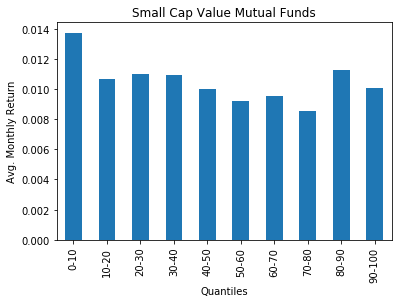

In [166]:
%pylab inline
df_stuff['mret'] = df_stuff['mret'].astype(float)
stuff = df_stuff.groupby(['percentile'])['mret'].agg('mean').plot(kind='bar')
stuff.set_xlabel('Quantiles')
stuff.set_ylabel('Avg. Monthly Return')
stuff.set_title('Small Cap Value Mutual Funds')


# xlabel('Largest MF by Quantile')